<a href="https://colab.research.google.com/github/Lohcinceat/Data-Analytic-Assigment/blob/main/Heart_Disease_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is already installed

In [69]:
df = pd.read_csv('https://github.com/Lohcinceat/Data-Analytic-Assigment/raw/main/Heart%20Disease_cleaned.csv')


In [70]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,2,25.10,2,1,2,0,0,1,1,1,3,1,9,2,2
1,2,25.00,2,1,2,14,0,1,6,1,1,1,8,2,2
2,2,19.97,2,1,2,0,0,2,5,1,3,1,6,2,2
3,2,19.74,1,1,2,0,0,2,6,1,3,1,8,2,2
4,2,27.46,1,1,2,0,0,1,6,1,3,1,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,2,19.66,2,1,2,0,0,2,6,1,3,1,8,2,2
9144,2,21.70,1,1,2,0,30,1,1,1,3,1,7,2,2
9145,2,28.80,1,1,2,0,5,1,2,1,3,1,7,2,2
9146,2,26.63,2,1,2,0,0,1,3,5,3,1,9,2,2


In [71]:
df["HeartDisease"] = df["HeartDisease"].replace(2,0)
df["Smoking"] = df["Smoking"].replace(2,0)
df["AlcoholDrinking"] = df["AlcoholDrinking"].replace(2,0)
df["Stroke"] = df["Stroke"].replace(2,0)
df["Sex"] = df["Sex"].replace(2,0)
df["Diabetic"] = df["Diabetic"].replace(2,1)
df["Diabetic"] = df["Diabetic"].replace(3,0)
df["Diabetic"] = df["Diabetic"].replace(4,0)
df["PhysicalActivity"] = df["PhysicalActivity"].replace(2,0)
df["Asthma"] = df["Asthma"].replace(2,0)
df["KidneyDisease"] = df["KidneyDisease"].replace(2,0)


In [72]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,0,25.10,0,1,0,0,0,1,1,1,0,1,9,0,0
1,0,25.00,0,1,0,14,0,1,6,1,1,1,8,0,0
2,0,19.97,0,1,0,0,0,0,5,1,0,1,6,0,0
3,0,19.74,1,1,0,0,0,0,6,1,0,1,8,0,0
4,0,27.46,1,1,0,0,0,1,6,1,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,0,19.66,0,1,0,0,0,0,6,1,0,1,8,0,0
9144,0,21.70,1,1,0,0,30,1,1,1,0,1,7,0,0
9145,0,28.80,1,1,0,0,5,1,2,1,0,1,7,0,0
9146,0,26.63,0,1,0,0,0,1,3,5,0,1,9,0,0


# Prediction Model Building

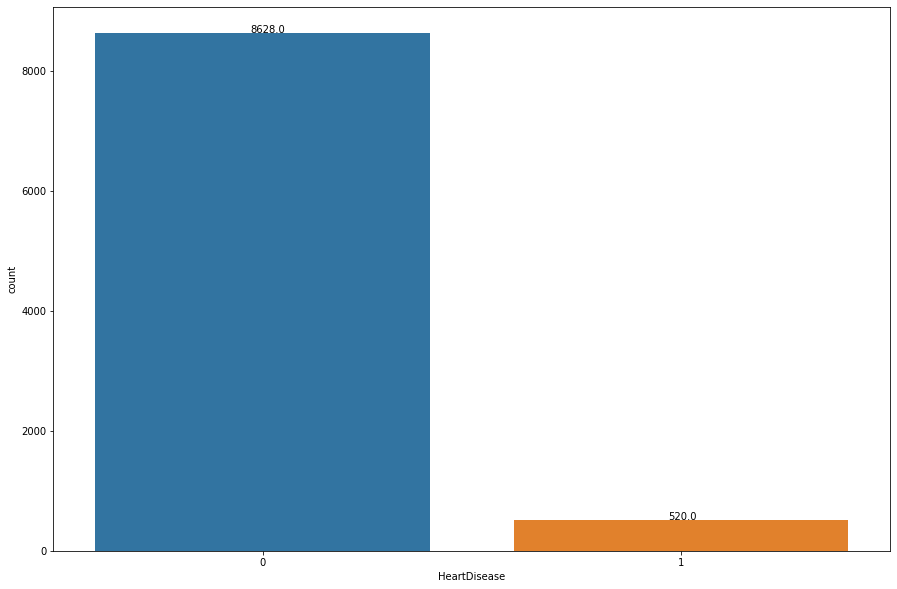

In [73]:
plt.rcParams['figure.figsize'] = (15, 10)
ax=sns.countplot(x='HeartDisease',data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.37, p.get_height()+0.05))
plt.show()


From the chart above we can see that the label of heart disease variable is highly imbalance with 8628 of answer of "0" which span 94% of the total answer.  This will results in the model built tend to biased to the prediction of the majority class which is "0" resulting in low recall perforance or high false negative rate. To prevent this from occurs, random oversampling technique is deployed as follow where examples from the minority class is randomly duplicated and adding them to the dataset until balanced class is obtain.


## Simple Random Oversampling

In [74]:
# sudo pip install imbalanced-learn
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define dataset
# independent variables
x = df.iloc[:,1:].values
# dependent variable
y = df.iloc[:,0].values

# summarize class distribution
print(Counter(y))


# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x, y)
# summarize class distribution
print(Counter(y_over))
type(y_over)

Counter({0: 8628, 1: 520})
Counter({0: 8628, 1: 8628})


numpy.ndarray

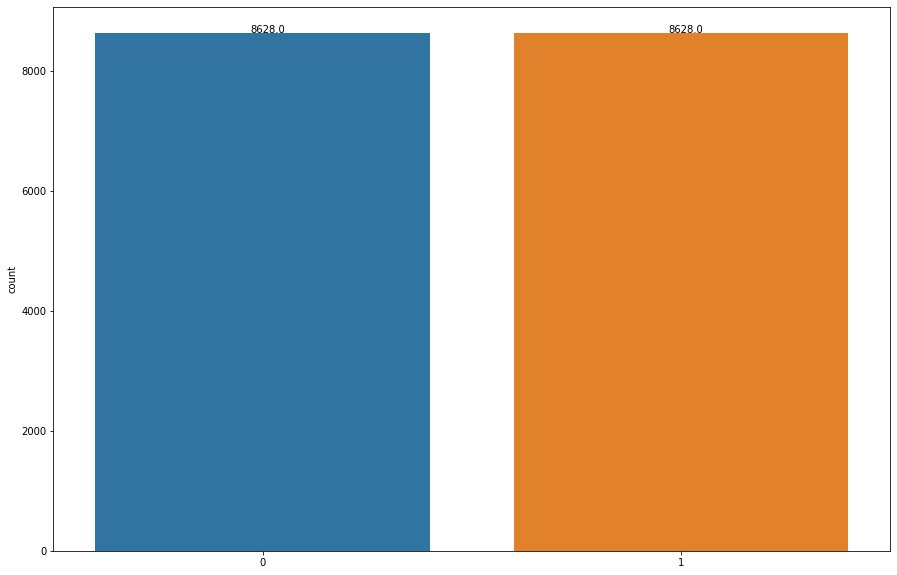

In [75]:
plt.rcParams['figure.figsize'] = (15, 10)
ax=sns.countplot(x=y_over)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.37, p.get_height()+0.05))
plt.show()


After oversampling the labels for the Heart Disease variable is balanced with both having 8628 occurence.

## Split Data into Training and Testing Set

In [76]:
from sklearn.model_selection import train_test_split
# Dividing Dataset into Training and Test Set
# independent variables

X_train, X_test, Y_train, Y_test = train_test_split(x_over, y_over, test_size=0.2)

print("Training and testing data size: ")
print("X_train",len(X_train))
print("X_test",len(X_test))
print("Y_train",len(Y_train))
print("Y_test",len(Y_test))


Training and testing data size: 
X_train 13804
X_test 3452
Y_train 13804
Y_test 3452


## K-Nearest Neighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier
# declaring a object of K Neighbors Classifier class
model1 = KNeighborsClassifier()
model1.fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
#Training model
model2 = LogisticRegression(random_state=0, max_iter=1000)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)


## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
model3 =RandomForestClassifier()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict((X_test))


# Model Evaluation

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## K-Nearest Neighbors

### Confusion Matrix

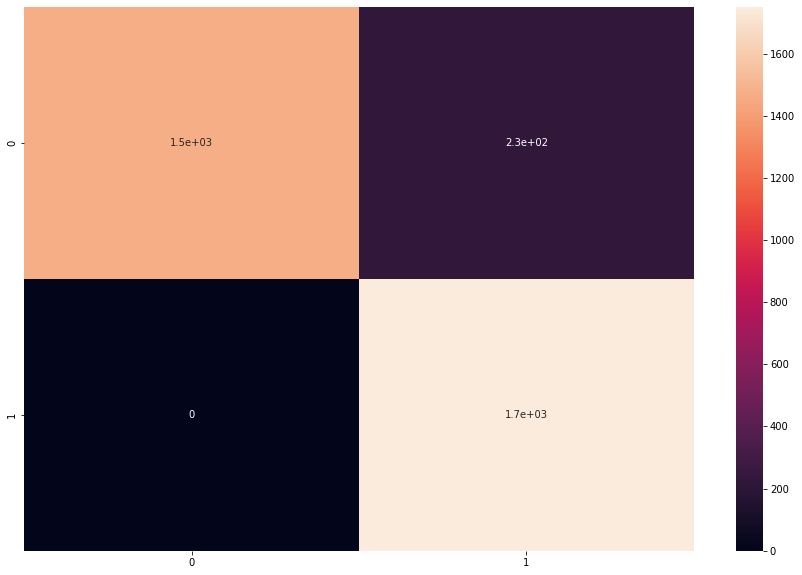

In [81]:
conf_matrix1=confusion_matrix(Y_test,y_pred1)

conf_matrix = pd.DataFrame(data=conf_matrix1, columns=[0, 1], index=[0, 1])
sns.heatmap(conf_matrix, annot=True)

### Model Performance

In [82]:
print("Result:")
print("KNN Model Accuracy : ","{:.2f}".format(accuracy_score(Y_test,y_pred1)))
print("KNN Model Precision : ","{:.2f}".format(precision_score(Y_test,y_pred1)))
print("KNN Model Recall : ","{:.2f}".format(recall_score(Y_test,y_pred1)))
print("KNN Model F1 Score : ","{:.2f}".format(f1_score(Y_test,y_pred1)))

Result:
KNN Model Accuracy :  0.93
KNN Model Precision :  0.88
KNN Model Recall :  1.00
KNN Model F1 Score :  0.94


### ROC curve


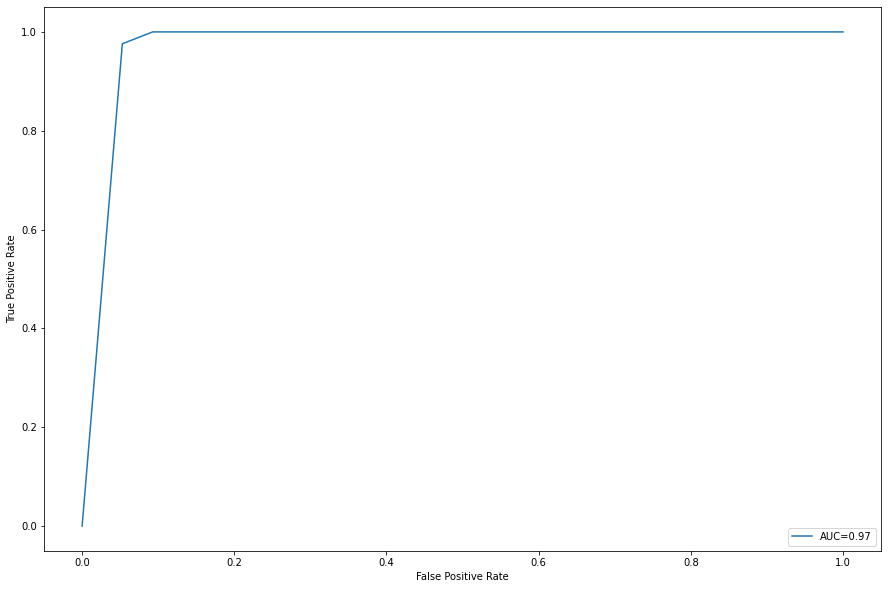

In [83]:
#define metrics
y_pred_proba = model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = "{:.2f}".format(metrics.roc_auc_score(Y_test, y_pred_proba))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression

### Confusion Matrix

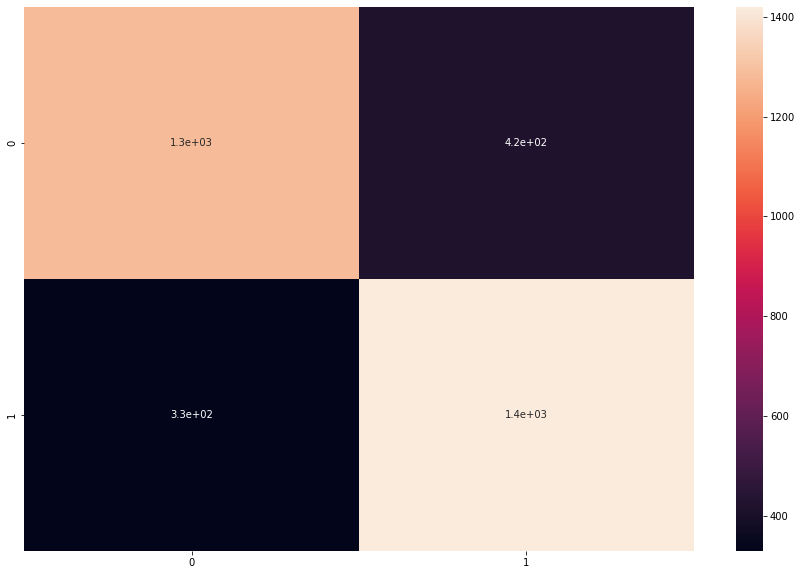

In [84]:
conf_matrix2=confusion_matrix(Y_test,y_pred2)
conf_matrix2 = pd.DataFrame(data=conf_matrix2, columns=[0, 1], index=[0, 1])
sns.heatmap(conf_matrix2, annot=True)

### Model Performance

In [86]:
print('')
print("Result:")
print("Logistic regression Accuracy : ","{:.2f}".format(accuracy_score(Y_test,y_pred2)))
print("Logistic regression Precision : ","{:.2f}".format(precision_score(Y_test,y_pred2)))
print("Logistic regression Recall : ","{:.2f}".format(recall_score(Y_test,y_pred2)))
print("Logistic regression F1 Score : ","{:.2f}".format(f1_score(Y_test,y_pred2)))


Result:
Logistic regression Accuracy :  0.78
Logistic regression Precision :  0.77
Logistic regression Recall :  0.81
Logistic regression F1 Score :  0.79


### ROC curve


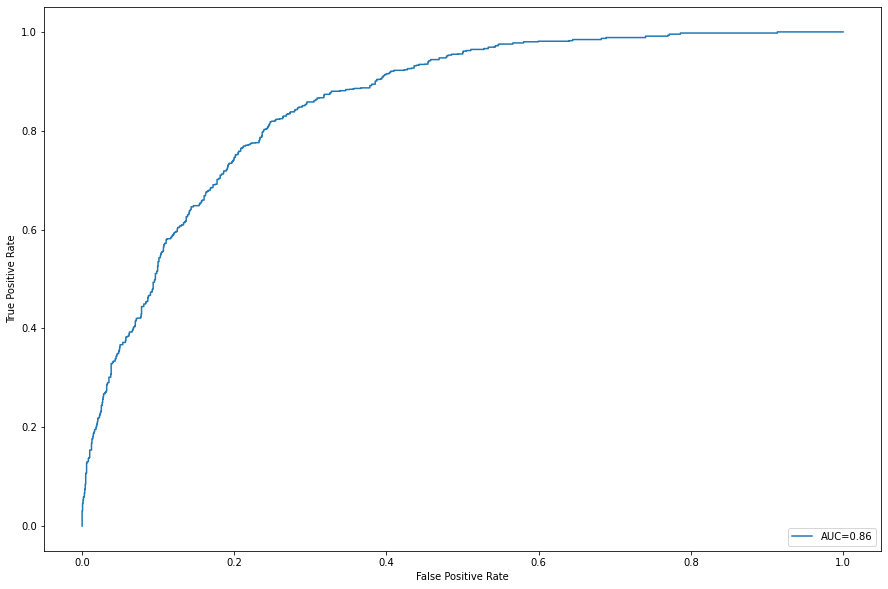

In [87]:
#define metrics
y_pred_proba = model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = "{:.2f}".format(metrics.roc_auc_score(Y_test, y_pred_proba))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest

### Confusion Matrix

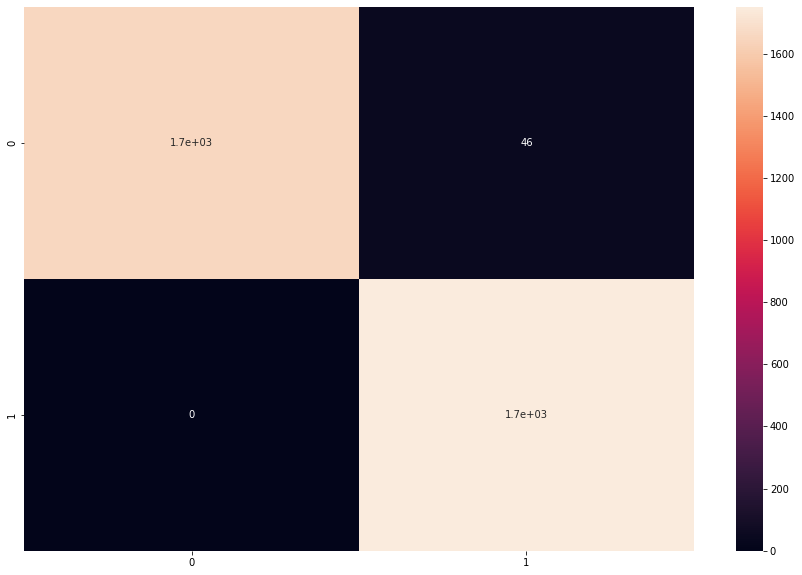

In [88]:
conf_matrix3=confusion_matrix(Y_test,y_pred3)
conf_matrix3 = pd.DataFrame(data=conf_matrix3, columns=[0, 1], index=[0, 1])
sns.heatmap(conf_matrix3, annot=True)

### Model Performance

In [89]:
print("Result:")
print("Logistic regression Accuracy : ","{:.2f}".format(accuracy_score(Y_test,y_pred3)))
print("Logistic regression Precision : ","{:.2f}".format(precision_score(Y_test,y_pred3)))
print("Logistic regression Recall : ","{:.2f}".format(recall_score(Y_test,y_pred3)))
print("Logistic regression F1 Score : ","{:.2f}".format(f1_score(Y_test,y_pred3)))

Result:
Logistic regression Accuracy :  0.99
Logistic regression Precision :  0.97
Logistic regression Recall :  1.00
Logistic regression F1 Score :  0.99


### ROC curve


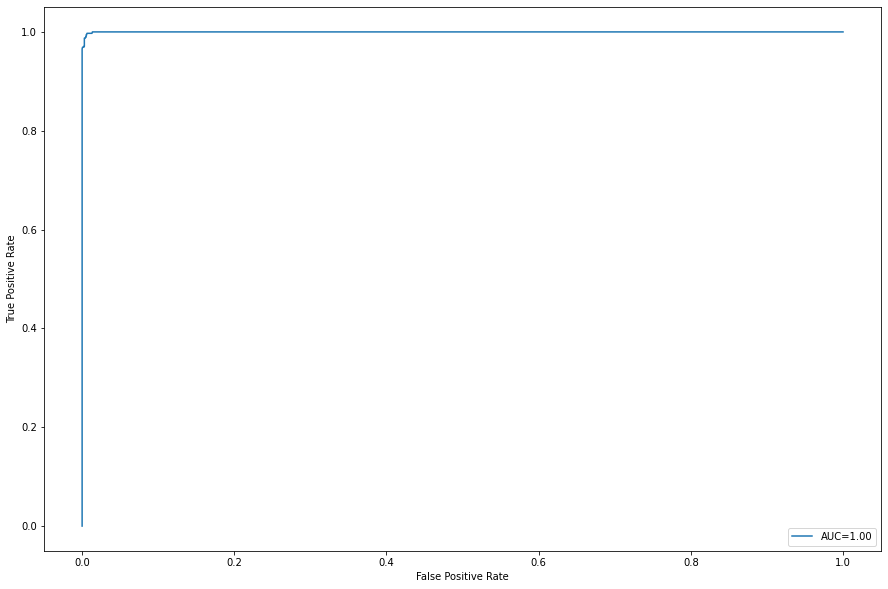

In [90]:
#define metrics
y_pred_proba = model3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = "{:.2f}".format(metrics.roc_auc_score(Y_test, y_pred_proba))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()